## Binarização com limiar

Normalmente a imagem é convertida para preto e branco.

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import mahotas

In [7]:
img = cv2.imread('../img/ponte.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
suave = cv2.GaussianBlur(img, (7, 7), 0) # aplica blur
(T, bin) = cv2.threshold(suave, 160, 255, cv2.THRESH_BINARY)
(T, binI) = cv2.threshold(suave, 160, 255, cv2.THRESH_BINARY_INV)
resultado = np.vstack([
    np.hstack([img, suave]),
    np.hstack([bin, binI])
])
cv2.imshow('Binarização da imagem', resultado)
cv2.waitKey(0)

-1

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x173f501cd60>)

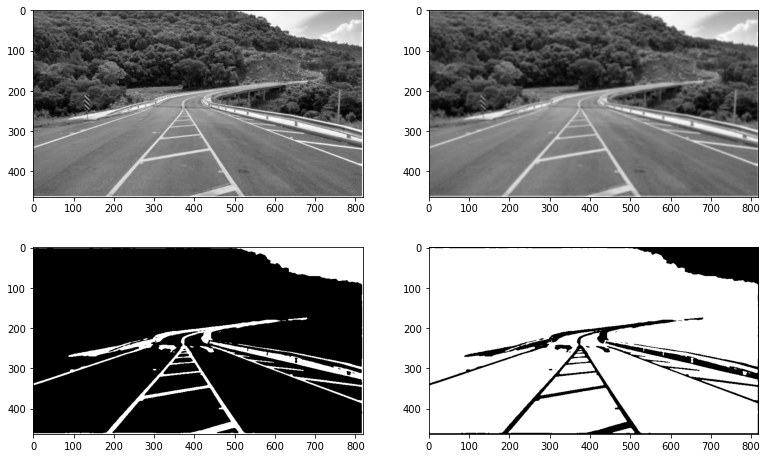

In [6]:
plt.figure(figsize=(13,8))
plt.subplot(221), plt.imshow(img, cmap='gray')
plt.subplot(222), plt.imshow(suave, cmap='gray')
plt.subplot(223), plt.imshow(bin, cmap='gray')
plt.subplot(224), plt.imshow(binI, cmap='gray')

## Threshold adaptativo

O 160 utilizado nas funções acima foi escolhido arbitrariamente. Porém esse valor pode ser otimizado matematicamente. Parâmetros utilizados: tamanho do kernel e um inteiro a ser subtraído da média calculada dentro do kernel.

In [9]:
bin1 = cv2.adaptiveThreshold(suave, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 21, 5)
bin2 = cv2.adaptiveThreshold(suave, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 21, 5)
resultado = np.vstack([
    np.hstack([img, suave]),
    np.hstack([bin1, bin2])
])
cv2.imshow('threshold adaptativo', resultado)
cv2.waitKey(0)

-1

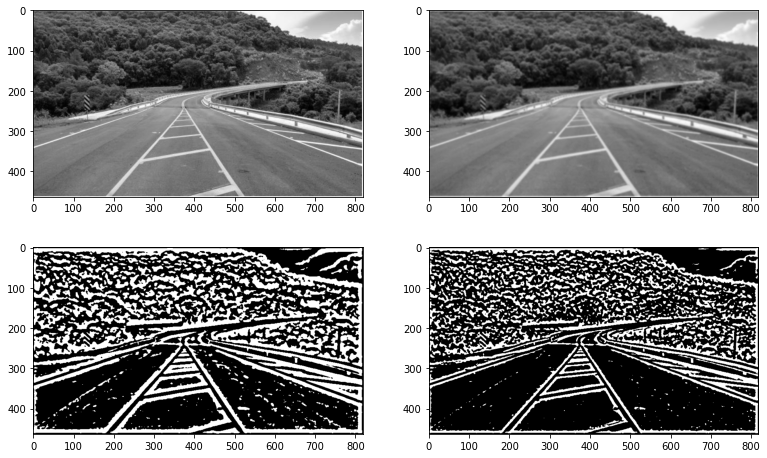

In [11]:
plt.figure(figsize=(13, 8))
plt.subplot(2,2,1), plt.imshow(img, cmap='gray')
plt.subplot(2,2,2), plt.imshow(suave, cmap='gray')
plt.subplot(2,2,3,), plt.imshow(bin1, cmap='gray')
plt.subplot(2,2,4), plt.imshow(bin2, cmap='gray')

plt.show()

## Threshold com Otsu e Riddler-Calvard

**Otsu**: analiza o histograma da imagem para encontrar os dois maiores picos de intensidades. Então calcula um valor para separar da melhor forma esses dois picos.

In [14]:
T = mahotas.thresholding.otsu(suave)
temp = img.copy()
temp[temp > T] = 255
temp[temp < 255] = 0
temp = cv2.bitwise_not(temp)
T = mahotas.thresholding.rc(suave)
temp2 = img.copy()
temp2[temp2 > T] = 255
temp2[temp2 < 255] = 0
temp2 = cv2.bitwise_not(temp2)
resultado = np.vstack([
    np.hstack([img, suave]),
    np.hstack([temp, temp2])
])
cv2.imshow('binarizacao com metodo de otsu e riddler-calvard', resultado)
cv2.waitKey(0)

-1

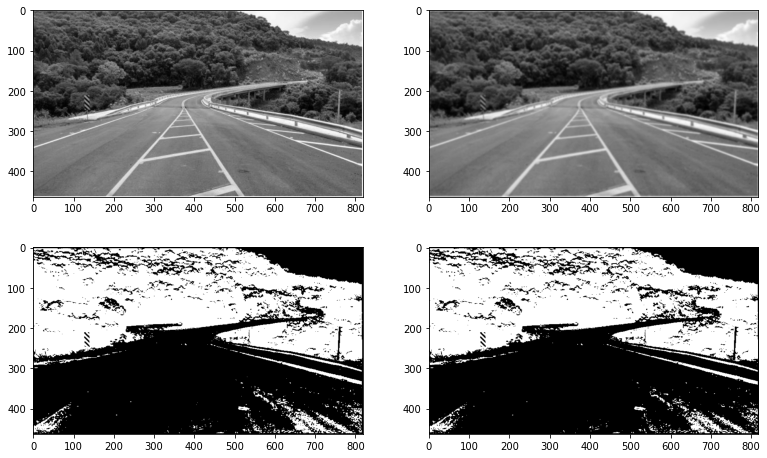

In [15]:
plt.figure(figsize=(13, 8))
plt.subplot(2,2,1), plt.imshow(img, cmap='gray')
plt.subplot(2,2,2), plt.imshow(suave, cmap='gray')
plt.subplot(2,2,3,), plt.imshow(temp, cmap='gray')
plt.subplot(2,2,4), plt.imshow(temp2, cmap='gray')

plt.show()